## Clustering Exercise

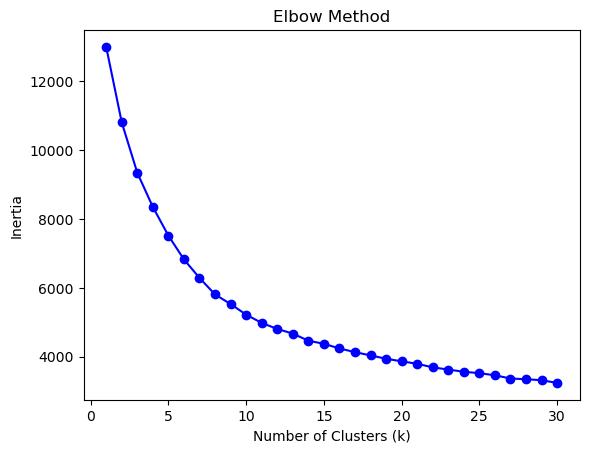

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Set the seed for reproducibility
np.random.seed(123)

import warnings
warnings.filterwarnings("ignore")

# Load the user profiles dataset
user_profile_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
user_profile_df = pd.read_csv(user_profile_url)

# Get the number of rows in the larger DataFrame
num_rows = len(user_profile_df)

# Generate a random index of 1000 rows
random_index = np.random.choice(num_rows, size=1000, replace=False)

# Select the random rows from the larger DataFrame
user_select_df = user_profile_df.iloc[random_index]

feature_names = list(user_select_df.columns[1:])

# The original user profile feature vector is not normalized, which may cause issues when we perform clustering
# Therefore, we standardize the data. We will use StandardScaler to make each feature have a mean of 0 and a standard deviation of 1.

scaler = StandardScaler()
user_select_df[feature_names] = scaler.fit_transform(user_select_df[feature_names])

# Select the features for clustering
features = user_select_df[feature_names]

features = user_select_df.loc[:, user_profile_df.columns != 'user']

user_ids = user_select_df.loc[:, user_select_df.columns == 'user']

# Define a range of possible cluster numbers
k_range = range(1, 31)

# Perform K-means clustering for each value of k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) for each k value
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Determine the best number of clusters using the elbow method
best_k = 8

# Initialize KMeans model with the best number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=123)

# Fit the KMeans model to the entire dataset
kmeans.fit(features)

cluster_labels = [kmeans.predict(features)] * len(user_ids)

labels = cluster_labels

In [2]:
def combine_cluster_labels(user_ids, labels):
    labels_df = pd.DataFrame(np.hstack(labels), columns=['cluster'])
    cluster_df = pd.concat([user_ids, labels_df], axis=1)
    return cluster_df

In [3]:
combine_cluster_labels(user_ids, labels)

,user,cluster
33504,2055835.0,2
11334,758376.0,5
27244,1566000.0,1
28396,1639742.0,5
11969,780292.0,5
...,...,...
999995,NaN,4
999996,NaN,4
999997,NaN,4
999998,NaN,6


In [4]:
combined_df = combine_cluster_labels(user_ids, labels)
first_10_rows = combined_df.head(10)
first_10_rows

,user,cluster
33504,2055835.0,2
11334,758376.0,5
27244,1566000.0,1
28396,1639742.0,5
11969,780292.0,5
21566,1231600.0,6
3591,437270.0,5
17667,1058367.0,1
29147,1687908.0,1
27468,1582183.0,4
